# Batch Gradient Descent 

La Descente de Gradient Batch travaille sur l'ensemble de données : 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

%matplotlib inline
plt.style.use(['ggplot'])

Création d'un jeu de données

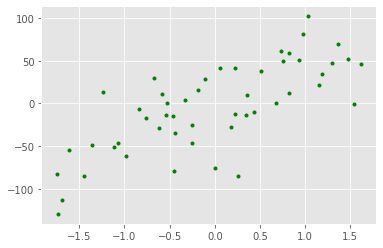

In [3]:
x,y = make_regression(n_samples=50, n_features=1, noise=30, random_state=100)
y = y.reshape(y.shape[0],1)
plt.plot(x,y,'.',c='green');

Ajout d'un vecteur de biais pour le pente de la régression : $[1]$

In [4]:
X = np.c_[x, np.ones((50,1))] # permet de concaténer

**Rappel** – Formule de calcul par les MCO :

$$ \beta_{MCO} = (X'X)X'Y$$

In [5]:
def mco(X,y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [6]:
beta = mco(X,y)
y_predict = X.dot(beta)

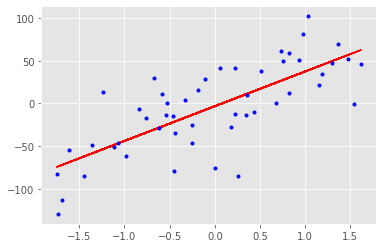

In [7]:
plt.plot(x,y_predict,'r-')
plt.plot(x,y,'b.');

Calcul de l'erreur de prédiction : 

In [19]:
def loss(X,y,beta):
    n = len(y)
    predictions = X.dot(beta)
    cost = (1/(n)) * np.sum((predictions-y)**2)
    
    return cost

In [20]:
print("L'erreur du modèle est de : {}" .format(round(loss(X,y,beta)),4))

L'erreur du modèle est de : 1185.0


Pour calculer la descente de Gradient : 




 
$$\beta_{t+1} = \beta_t - \eta \frac{\partial Loss }{\partial \beta}$$


Ou le Gradient se calcule par :

$$\frac{\partial Loss}{\partial \beta} = \frac{1}n  \hspace{0.1cm} X^T (X\beta - y) $$

In [13]:
def gradient_descent(X,y,beta, learning_rate=0.01, n_iter=100):
    '''
    X = Matrice de données avec colonne de biais
    y = Vecteur des valeurs à prédire
    beta = Vecteur de beta avec : np.random.randn(j,1)
    learning_rate  = taux d'apprentissage pour fixer la vitesse de convergence
    iterations = nombre d'iterations
    
    Retourne les coefficients beta estimés, un tableau de la loss et des coefficients
    à chaque itération.
    '''

    n = len(y)
    loss_ = []
    
    for i in range(n_iter):
        
        # y prédit
        prediction = X.dot(beta)
        
        # erreur quadratique du modèle
        erreur = (y - prediction)**2
        
        # Mean Square Error
        loss = erreur.mean()
        
        # Calcul de la dérivée du Gradient
        gradient = (1/n) * X.T.dot(prediction - y)
        
        # Mise à jour des paramètres
        beta = beta - learning_rate * gradient
        
        loss_.append(loss)
    
    return beta, loss_

Initialisation de la descente de Gradient : 

In [14]:
np.random.seed(200)

beta_init = np.random.randint(20, size=(2,1))
print(beta_init)

[[ 9]
 [16]]


In [15]:
beta_dg, cout_dg = gradient_descent(X, y, 
                                    beta_init, learning_rate=0.1)

Paramètre estimée par la descente de gradient : 

In [21]:
beta_dg

array([[40.72562102],
       [-3.27333179]])

Paramètre estimée des MCO : 

In [17]:
beta_mco = mco(X,y)
beta_mco

array([[40.7282697 ],
       [-3.27314989]])

Erreur du modèle selon les itérations : 

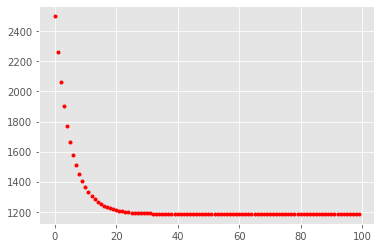

In [18]:
plt.plot(cout_dg, 'r.');

# Stochastic Gradient Descent 

Lors d'une Descente de gradient, **un lot** représente le **nombre total d'exemples utilisés pour calculer le gradient** à chaque itération. Pour la descente de Gradient "Vanilla" ou "Batch" le lot correspondait à l'intégralité de l'ensemble de données. Mais : 

-  Lorsque le lot est très important, la durée des calculs pour une simple itération peut être longue.
- Un ensemble de données important contient généralement des données redondantes.

La **Descente de Gradient Stochastique** (SGD) effectue une mise à jour des paramètres pour **chaque exemple d'entraînement** $x(i)$ et l'étiquette $y(i)$. Ainsi, elle n'utilise qu'un exemple à la fois (un lot dont la taille est 1) par itération. Si le nombre d'itérations est assez important, la SGD fonctionne, tout en générant beaucoup de bruit. 

*Le terme "stochastique" signifie que l'exemple constituant chaque lot est sélectionné de façon aléatoire.*


La Descente de Gradient Stochastique peut se réécrire :

$$ {\begin{bmatrix}\beta_{0,n+1}\\ \beta_{1,n+1}\end{bmatrix}} = {\begin{bmatrix}\beta_{0}\\ \beta_{1}\end{bmatrix}} - \eta \begin{bmatrix}2(\beta_{0}+\beta_{1}x_{i} - y_{i}) \\
2x_i(\beta_{0}+\beta_{1}x_{i} - y_{i})
\end{bmatrix}$$

Ou $i$ est une observation aléatoire.

In [22]:
def stochastic_gradient_descent(X,y,beta,learning_rate=0.01,iterations=10):
    '''
    X = Matrice de données avec colonne de biais
    y = Vecteur des valeurs à prédire
    beta = Vecteur de beta avec : np.random.randn(j,1)
    learning_rate  = taux d'apprentissage pour fixer la vitesse de convergence
    iterations = nombre d'iterations
    
    Retourne les coefficients beta estimés, un tableau de la loss
    à chaque itération.
    '''
    
    n = len(y)
    cost_history = np.zeros(iterations)
    
    for it in range(iterations):
        
        # Choix de l'observation aléatoire
        rand_ind = np.random.randint(0,n)
        X_i = X[rand_ind,:].reshape(1,X.shape[1])
        y_i = y[rand_ind].reshape(1,1)

         # Calcul de la prédiction de l'observation
        prediction = np.dot(X_i,beta)
        
        # Mise à jour des paramètres
        beta = beta - learning_rate * (X_i.T.dot((prediction - y_i)))
        
        cost_history[it] = loss(X, y, beta)
        
    return beta, cost_history

Initalisation d'un vecteur aléatoire :

In [23]:
beta_test = np.array([-100,-100]).reshape(2,1)

In [25]:
beta_dg, cout_dg = gradient_descent(X, y, 
                                    beta_test, 
                                    learning_rate=0.1, n_iter=100)

%time

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


In [42]:
beta_sgd, cout_sgd = stochastic_gradient_descent(X,y, 
                                                 beta_test,
                                                 learning_rate=0.1, iterations=100)

%time

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


Les paramètres estimés grâce à la **Descente de Gradient Stochastique** : 

In [43]:
beta_sgd

array([[41.24498299],
       [-5.82630382]])

Ils sont encore différents de la Descente de Gradient, car se trouve au voisinage du minimum local : 

In [34]:
beta_mco

array([[40.7282697 ],
       [-3.27314989]])

On peut voir que que la Descente de Gradient Stochastique se rapproche du minimum plus rapidement.

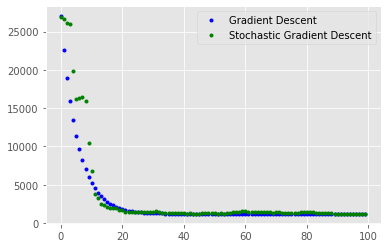

In [44]:
plt.plot(cout_dg, 'b.', zorder=3, label='Gradient Descent');
plt.plot(cout_sgd, 'g.', label='Stochastic Gradient Descent', 
         zorder=3)
plt.legend();

# Mini Batch Gradient Descent 

La descente de **Gradient par mini-lots** est un compromis entre l'itération en batch (lots entiers) et la Descente de Gradient Stochastique (1 observation à la fois).

- Un mini-lot comprend généralement un petit nombre d'exemples sélectionnés aléatoirement (entre 16 et 50 généralement). 

Le **Mini Batch Gradient Descent** limite la quantité de bruit (diminue la variance des paramètres estimés) comparé à la Descente de Gradient Stochastique tout en restant plus efficace en termes de calcul que le traitement de lots entiers.

In [45]:
def choice_batch(X,y,len_batch=16):
    '''
    Permet de sélectionner aléatoirement n observation(s) aléatoire(s) 
    d'un jeu de données.
    
    Parameters : 
    ---------------
    X = Matrice de données avec colonne de biais
    y = Vecteur de valeur à prédire 
    len_batch = Taille du sous-échantillon 
    
    
    Return :
    -------------
    Retourne un tableau @len_batch du sous-échantillon de X et de y.
    
    
    '''
    x_sample = []
    y_sample = []
    
    list_indice = np.random.randint(X.shape[0], size=(len_batch,1)).flatten()
    
    for i in list_indice:
        x_sample.append(X[i])
        y_sample.append(y[i])
    
    return np.array(x_sample), np.array(y_sample)

In [46]:
def mini_batch_gradient_descent(X,y,beta,learning_rate=0.01,iterations=1000, batch=16):
    '''
    X = Matrice de données avec colonne de biais
    y = Vecteur des valeurs à prédire
    beta = Vecteur de beta initial avec : np.random.randn(j,1)
    learning_rate  = taux d'apprentissage pour fixer la vitesse de convergence
    iterations = nombre d'iterations
    batch = taille de l'échantillon aléatoire utilisé
    
    Retourne les coefficients beta estimés, un tableau de la loss
    à chaque itération.
    '''
    
    n = len(y)
    cost_history = np.zeros(iterations)
    
    for it in range(iterations):
        
        # Observations du batch aléatoire
        
        X_i, y_i = choice_batch(X,y,batch)
        
        # Calcul de la prédiction de l'observation
        prediction = np.dot(X_i,beta)
        
        # Mise à jour des poids
        beta = beta - learning_rate * (1/batch) * (X_i.T.dot((prediction - y_i)))
        
        cost_history[it] = loss(X,y,beta)
        
    return beta, cost_history

On peut lancer une Descente de Gradient avec un mini batch de 8 observations : 

In [47]:
beta_minibatch, cost_batch = mini_batch_gradient_descent(X,y, beta_test, 
                                                         learning_rate=0.1, iterations=100, batch=8)

%time

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.11 µs


Les paramètres estimés sont encore différents de ceux des MCO, même après de nombreuses itérations et un pas plus faible.

In [48]:
beta_minibatch

array([[43.68528917],
       [-8.4729835 ]])

In [49]:
beta_mco

array([[40.7282697 ],
       [-3.27314989]])

On peut afficher les courbes de Loss pour les 3 types de Descentes de Gradient et les droites estimés :

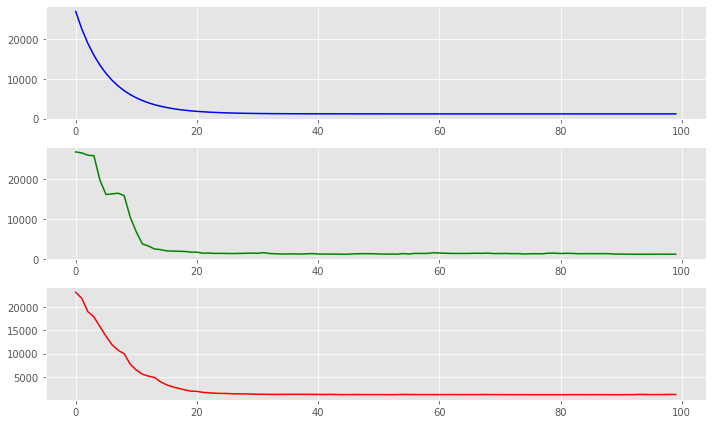

In [50]:
plt.figure(figsize=(10,6))
plt.title("Comparaison des différentes Descente de Gradient")

plt.subplot(311)
plt.plot(cout_dg, 'b', zorder= 3, label='Gradient Descent')
plt.subplot(312)
plt.plot(cout_sgd, 'g', label='Stochastic Gradient Descent')
plt.subplot(313)
plt.plot(cost_batch, 'r', label='Mini-Batch (16) Gradient Descent')
plt.tight_layout()

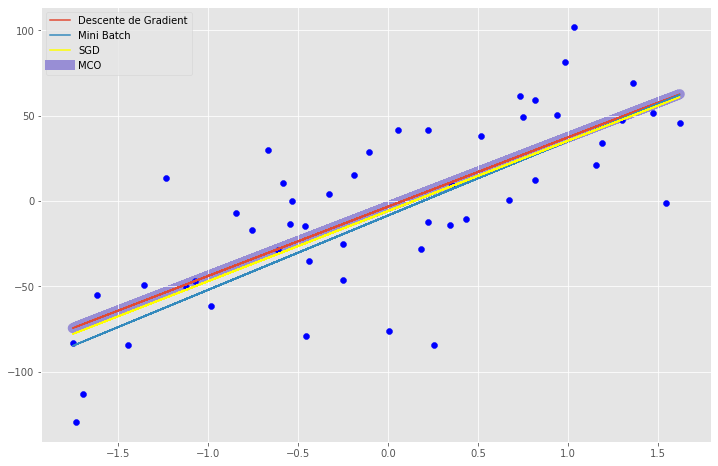

In [51]:
plt.figure(figsize=(12,8))
plt.scatter(x,y, c='b')
plt.plot(x, X.dot(beta_dg), label='Descente de Gradient')
plt.plot(x, X.dot(beta_minibatch), label='Mini Batch')
plt.plot(x,X.dot(beta_sgd), label='SGD',c='yellow')
plt.plot(x,y_predict, label='MCO', lw=10, zorder=-3)
plt.legend();

Les Descentes de Gradient par Mini-batch et Stochastique ne garantissent pas forcément une bonne convergence de l'algorithme. Pour cela il existe différents algorithme d'optimistion de ces Descente de Gradient : 

---

**Momentum** : Le momentum est une méthode qui permet d'accélérer la SGD dans la direction appropriée et d'amortir
l'oscillation. Pour cela on crée un paramètre *vélocité* qui a pour but de *réduire l'oscillation*. 

>Le Momentum est généralement fixé à 0.9.

In [52]:
def sgd_momentum(X,y,beta,learning_rate=0.01,iterations=10, momentum=0.9):
    '''
    X = Matrice de données avec colonne de biais
    y = Vecteur des valeurs à prédire
    beta = Vecteur de beta avec : np.random.randn(j,1)
    learning_rate  = taux d'apprentissage pour fixer la vitesse de convergence
    iterations = nombre d'iterations
    rho = 
    
    Retourne les coefficients beta estimés, un tableau de la loss
    à chaque itération.
    '''
    
    n = len(y)
    cost_history = np.zeros(iterations)
    velocite = 0
    
    for it in range(iterations):
        
        # Choix de l'observation
        rand_ind = np.random.randint(0,n)
        X_i = X[rand_ind,:].reshape(1,X.shape[1])
        y_i = y[rand_ind].reshape(1,1)

        # Calcul de la prédiction de l'observation
        prediction = np.dot(X_i,beta)
        
        gradient = X_i.T.dot((prediction - y_i))
        
        # Mise à jour par un momentum
        velocite = momentum * velocite - learning_rate * gradient
        beta = beta + velocite  
        
        cost_history[it] = loss(X, y, beta)
        
    return beta, cost_history

On initialise différent dégrés de **momentum** : 

In [53]:
mom_beta = []
mom_loss = []
rho = []

for i in np.arange(0,1,0.4):
    a,z = sgd_momentum(X,y,beta_test, learning_rate=0.01, 
                   iterations=1000,momentum=i)
    
    rho.append(i)
    mom_beta.append(a)
    mom_loss.append(z)

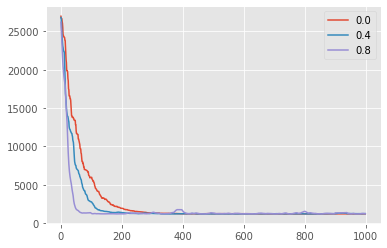

In [54]:
for i in mom_loss:
    plt.plot(range(len(i)), i, label='$\rho = i$')

plt.legend(np.round(rho,3));

In [55]:
for i,j in zip(mom_beta, rho) : 
    print('Rho =',np.round(j,3),':',i.flatten())

Rho = 0.0 : [42.76977546 -3.68460418]
Rho = 0.4 : [46.18578772  0.62157055]
Rho = 0.8 : [37.32391256  0.85052833]


In [56]:
beta_mco

array([[40.7282697 ],
       [-3.27314989]])

**AdaGrad** : cet algorithme d'optimisation de la Descente de Gradient permet de mettre à jours le learning rate selon la valeur du gradient calculé à chaque itération. Il possède un paramètre **epsilon** très petit (généralement 0.0001) qui permet d'éviter la division par 0 à la fin des itérations.

Pour calculer le nouveau learning rate à chaque itération : $$\frac{\eta}{\sqrt{(g^2) + \epsilon}}g$$


Par cette méthode, les mises-à-jour **trop importantes** des paramètres sont **atténuées** tandis que les **petites modifications** sont faites avec un taux **d'apprentissage plus grand**. Par conséquent, la taille des pas se fait sur une plus longue période.

In [257]:
def Adagrad(X,y,beta,learning_rate=0.01,n_iter=10):
    '''
    X = Matrice de données avec colonne de biais
    y = Vecteur des valeurs à prédire
    beta = Vecteur de beta avec : np.random.randn(j,1)
    learning_rate  = taux d'apprentissage pour fixer la vitesse de convergence
    iterations = nombre d'iterations
    
    Retourne les coefficients beta estimés, un tableau de la loss
    à chaque itération.
    '''
    
    n = len(y)
    cost_history = np.zeros(n_iter)
    grad_square = 0
    
    for it in range(n_iter):
        
        # Choix de l'observation aléatoire
        rand_ind = np.random.randint(0,n)
        X_i = X[rand_ind,:].reshape(1,X.shape[1])
        y_i = y[rand_ind].reshape(1,1)

         # Calcul de la prédiction de l'observation
        prediction = np.dot(X_i,beta)
        gradient = X_i.T.dot((prediction - y_i))
        
        # Mise à jour des paramètres
        grad_square += gradient * gradient
        beta = beta - (learning_rate / (np.sqrt(grad_square) + 1e-9)) * gradient
        
        cost_history[it] = loss(X, y, beta)
        
    return beta, cost_history

In [266]:
paramADA, lossADA = Adagrad(X,y, beta_init, learning_rate=0.001, n_iter=10000)

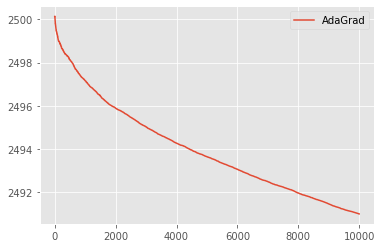

In [267]:
#plt.plot(perteDG, label="Descente de Gradient Stochastique")
plt.plot(lossADA, label="AdaGrad")
plt.legend();

In [268]:
paramADA

array([[ 9.1032927],
       [15.9203123]])

**Adam** :